In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import ot

ModuleNotFoundError: No module named 'ot'

In [372]:
exp_n = []
exp_c = []

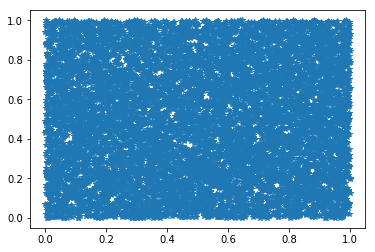

In [384]:
nsamples = 10000
U1 = np.random.rand(nsamples)
U2 = np.random.rand(nsamples)
plt.plot(U1, U2, '*')

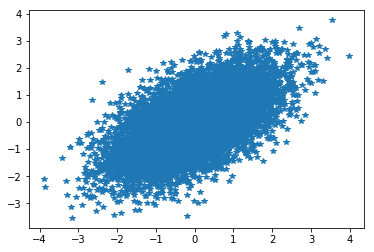

In [385]:
r = 0.6
R = np.array([[1.0,r],[r,1.0]])
G = np.random.multivariate_normal(np.zeros(2), R, nsamples)
G1 = G[:,0]
G2 = G[:,1]
plt.plot(G1,G2, '*')

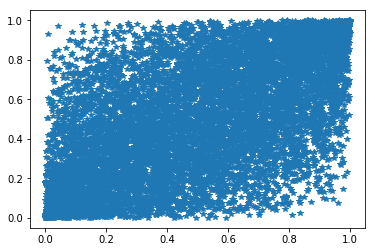

In [386]:
from scipy.stats import norm
C1 = norm.cdf(G1)
C2 = norm.cdf(G2)
plt.plot(C1,C2, '*')

In [387]:
xs = np.array([U1,U2]).T
xt = np.array([C1,C2]).T
a, b = np.ones((nsamples,)) / nsamples, np.ones((nsamples,)) / nsamples  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)

In [388]:
#%% EMD
cost = ot.emd2(a, b, M, numItermax=10000000)
exp_n+=[nsamples]
exp_c+=[cost]
cost

0.017225276719495957

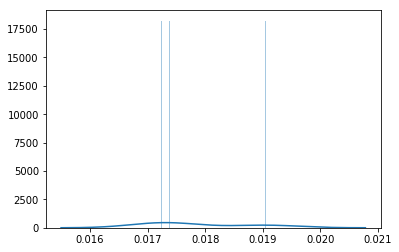

In [389]:
sb.distplot(np.array(exp_c), bins=100)

In [76]:
exp_c

[0.008682188901920226,
 0.009244583997416117,
 0.00792856105723493,
 0.00864139579686013,
 0.009492680515431774,
 0.008877449853448818,
 0.008849423704746033,
 0.008146117310081673,
 0.008816769510338326,
 0.008921915240963642]

In [78]:
np.mean(np.array(exp_c))

0.008760108588844167

In [79]:
np.std(np.array(exp_c))

0.00043716551287244595

In [88]:
100*np.std(np.array(exp_c))/np.mean(np.array(exp_c))

4.9904120301564294

In [ ]:

#%% plot samples

plt.figure(1)
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(M, interpolation='nearest')
plt.title('Cost matrix M')


plt.figure(3)
plt.imshow(G0, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')
print('cost', (G0*M).sum())

# Optimal Map

In [93]:
def root(S):
    L, Q = np.linalg.eigh(S)
    LL = (L > 0)*L +(L<=0)*L[np.argwhere(L > 0)[0]]/10
    return np.real(Q.dot(np.diag(LL**0.5)).dot(Q.T))

def w2_cost(P, Q, P2=None):
    if P2 is None:
        P2 = root(P)
    return np.sum(np.abs(np.diag(P + Q -2*root(P2.dot(Q).dot(P2)) )))**0.5

def w2_map(P, Q):
    P2 = root(P)
    P_2 = np.linalg.inv(P2)
    return P_2.dot(root(P2.dot(Q).dot(P2))).dot(P_2)

In [190]:
P = np.eye(2)
M = w2_map(P, R)

In [253]:
def opt_map_copulas(u):
    return norm.cdf(M.dot(norm.ppf(u)))

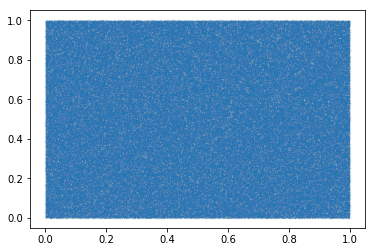

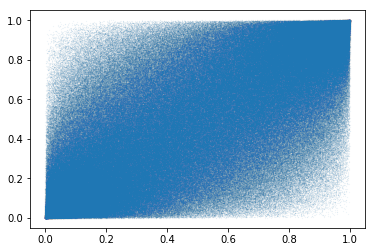

In [269]:
nsamples = 1000000
U1 = np.random.rand(nsamples)
U2 = np.random.rand(nsamples)
U = np.array([U1,U2])
plt.plot(U1, U2, '.', ms=0.05)
plt.show()
C = opt_map_copulas(U)
plt.plot(C[0,:], C[1,:], '.', ms=0.05)

In [270]:
((opt_map_copulas(U)- U)**2).sum(axis=0).mean()

0.018728199856787524

In [258]:
from scipy import integrate
def f(x, y):
    X = np.array([x,y])
    return np.sum((opt_map_copulas(X)-X)**2)

def bounds_y():
    return [0, 1.0]

def bounds_x(y):
    return [0, 1.0]

integrate.nquad(f, [bounds_x, bounds_y])

(0.018705627623667537, 1.4867539253546336e-08)

# Check Gaussian Case

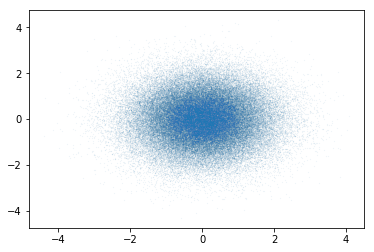

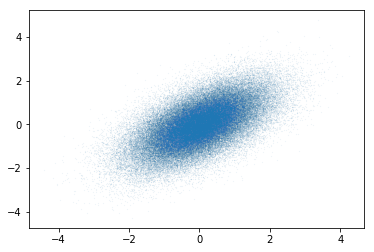

In [352]:
nsamples = 100000
U1 = np.random.randn(nsamples)
U2 = np.random.randn(nsamples)
U = np.array([U1,U2])
plt.plot(U1, U2, '.', ms=0.05*100000/nsamples)
plt.show()

G = w2_map(P,R).dot(U)
G1 = G[0,:]
G2 = G[1,:]
plt.plot(G1, G2, '.', ms=0.05*100000/nsamples)

In [354]:
((w2_map(P,R).dot(U)- U)**2).sum(axis=0).mean()

0.20507524168891933

In [355]:
w2_cost(P,R)**2

0.20526680779794537

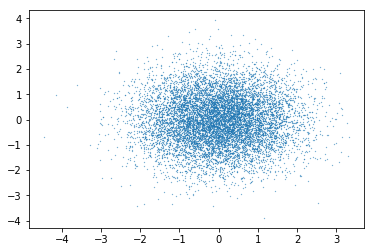

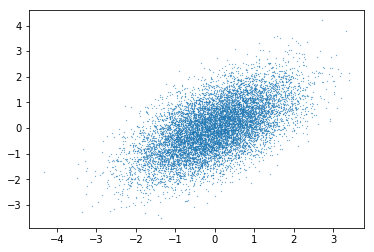

In [356]:
nsamples = 10000
U1 = np.random.randn(nsamples)
U2 = np.random.randn(nsamples)
U = np.array([U1,U2])

G = np.random.multivariate_normal(np.zeros(2), R, nsamples)
G1 = G[:,0]
G2 = G[:,1]

plt.plot(U1, U2, '.', ms=0.05*100000/nsamples)
plt.show()
plt.plot(G1, G2, '.', ms=0.05*100000/nsamples)

In [370]:
xs = np.array([U1,U2]).T
xt = np.array([G1,G2]).T
a, b = np.ones((nsamples,)) / nsamples, np.ones((nsamples,)) / nsamples  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)

In [371]:
#%% EMD
G0, log = ot.emd(a, b, M, numItermax=10000000, log=True)
np.sum(G0*M)

0.20757225419630437

In [362]:
log

{'cost': 0.0025564577604957647,
 'result_code': 1,
 'u': array([ 0.06941127,  0.07772393,  0.09643073, ...,  0.07388575,
         0.07690647,  0.07781776]),
 'v': array([-0.06561478, -0.06957651, -0.07481403, ..., -0.07650454,
        -0.08012358, -0.06353453]),
 'warning': None}

cost 0.00239098129582


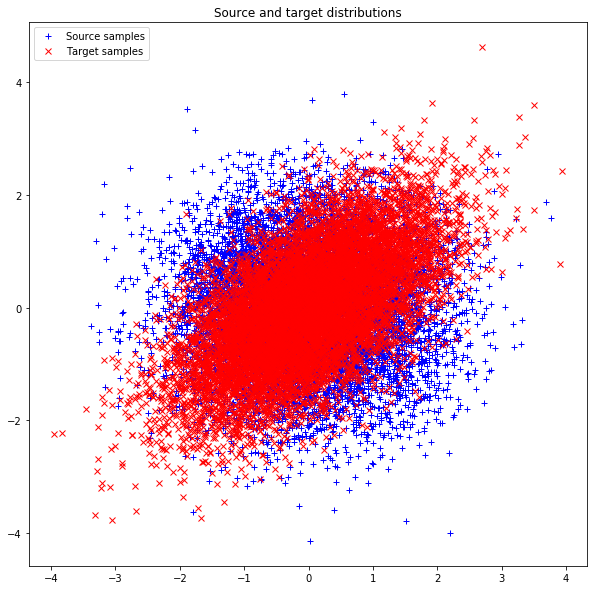

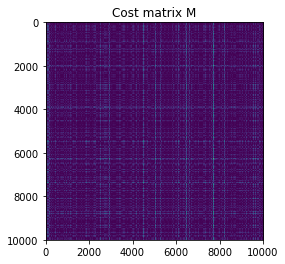

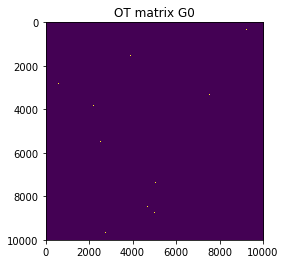

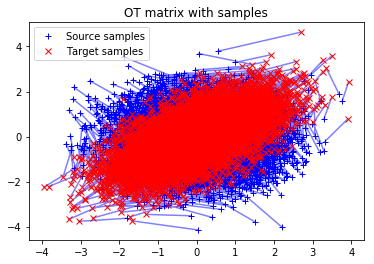

In [342]:
#%% plot samples

plt.figure(1, figsize=(10,10))
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('Source and target distributions')

plt.figure(2)
plt.imshow(M, interpolation='nearest')
plt.title('Cost matrix M')


plt.figure(3)
plt.imshow(G0, interpolation='nearest')
plt.title('OT matrix G0')

plt.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
plt.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
plt.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
plt.legend(loc=0)
plt.title('OT matrix with samples')
print('cost', (G0*M).sum())

In [109]:
def z_func(X,Y, coordinate=0):
    return np.nan_to_num(np.array([opt_map_copulas(np.array([i,j]))[coordinate] for i,j in zip(X.flat,Y.flat)]).reshape(X.shape))
 
def dz_func(X,Y, coordinate=0):    
    if coordinate==0:
        return (z_func(X,Y+d,0)-z_func(X,Y-d,0))/(2*d)
    else:
        return (z_func(X+d,Y,1)-z_func(X-d,Y,1))/(2*d)
    
F = z_func
#F = dz_func
    
x = np.arange(0.0,1.0,0.01)
y = np.arange(0.0,1.0,0.01)
X,Y = np.meshgrid(x, y) # grid of point

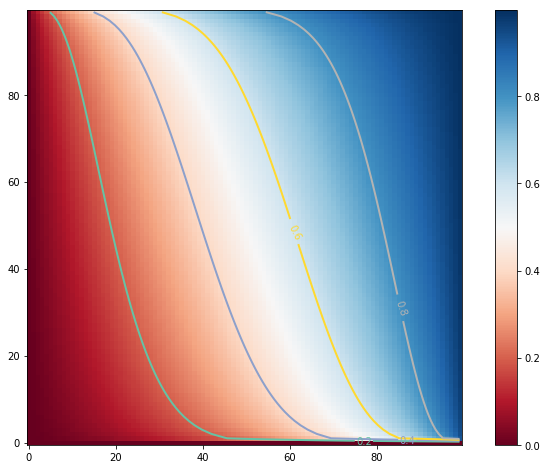

In [115]:
Z = F(X, Y, coordinate=0)
plt.figure(figsize=(12,8))
im = plt.imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = plt.contour(Z,np.arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
# latex fashion title
plt.show()

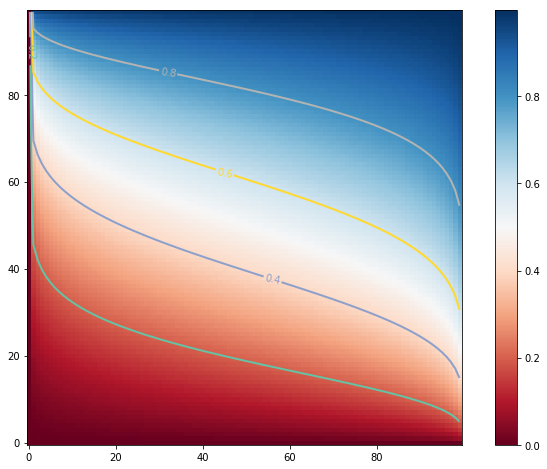

In [116]:
Z = F(X, Y, coordinate=1)
plt.figure(figsize=(12,8))
im = plt.imshow(Z,cmap=cm.RdBu, origin='lower') # drawing the function
# adding the Contour lines with labels
cset = plt.contour(Z,np.arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
plt.colorbar(im) # adding the colobar on the right
# latex fashion title
plt.show()

<IPython.core.display.Javascript object>


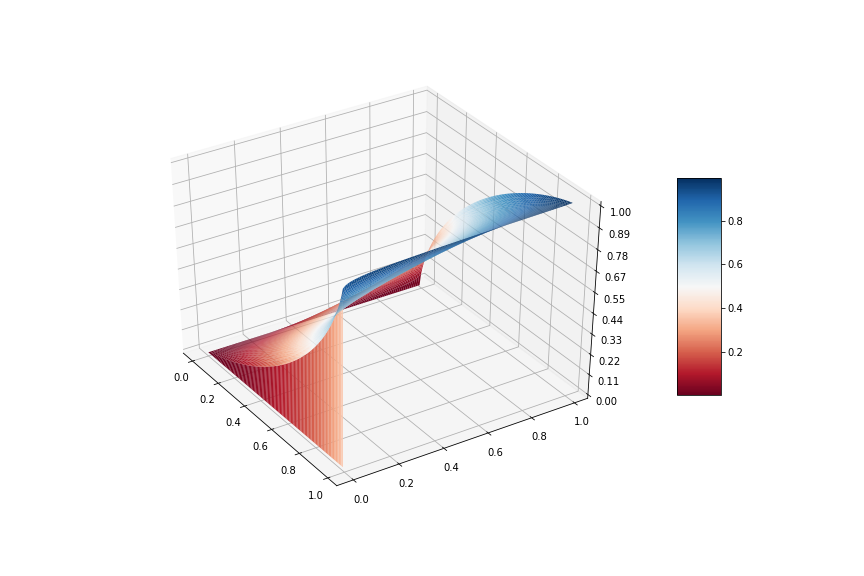

In [118]:
#%matplotlib notebook

Z = F(X, Y, coordinate=0)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

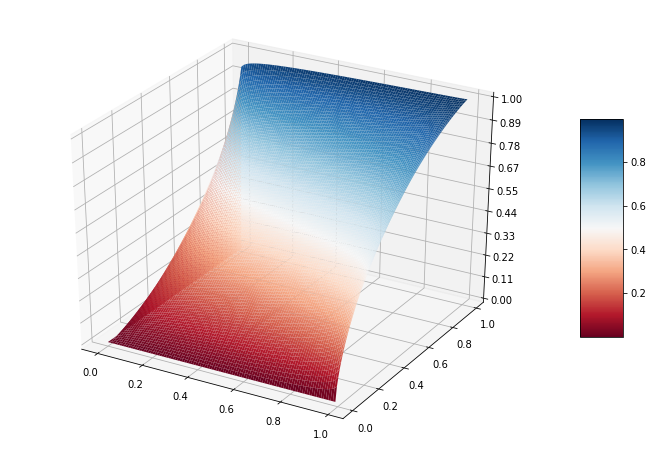

In [120]:
#%matplotlib inline

Z = F(X, Y, coordinate=1)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()